## Astrocytes

525 525 3


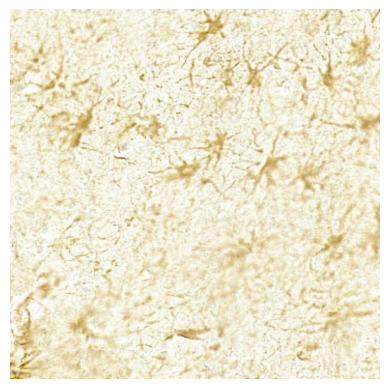

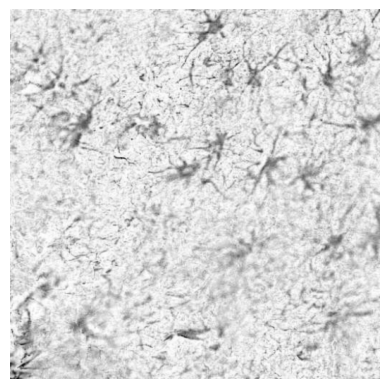

In [135]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#resize
img = cv2.imread("/home/htic/Desktop/raisa/B_313_1373/tile_31744_218624.jpeg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
height,width,channels=img.shape
#print(f"{height} {width} {channels}")
#525 527 3

img=cv2.resize(img,(525,525))
height,width,channels=img.shape
print(f"{height} {width} {channels}")

#rgb image
plt.imshow(img)
plt.axis('off')
plt.show()

#grayscale image
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray,cmap='gray')
plt.axis('off')
plt.show()

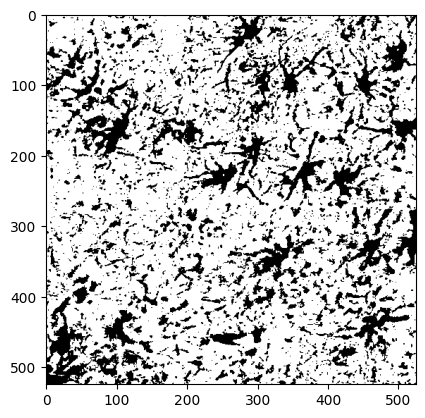

In [119]:
clahe = cv2.createCLAHE(clipLimit=5)
clahe_img = np.clip(clahe.apply(img_gray) + 20, 0, 255).astype(np.uint8)
_, threshold_img = cv2.threshold(img_gray, 215, 255, cv2.THRESH_BINARY)
plt.imshow(threshold_img,cmap='gray')

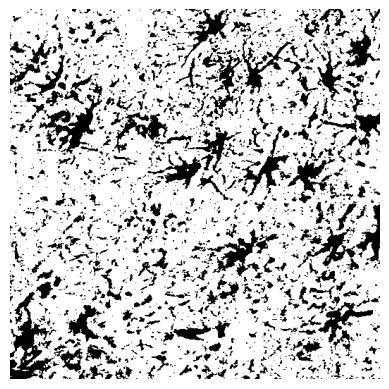

In [120]:

_, otsu_thresh = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.axis('off')
plt.imshow(otsu_thresh,cmap='gray')

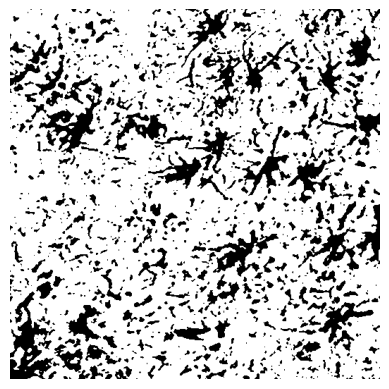

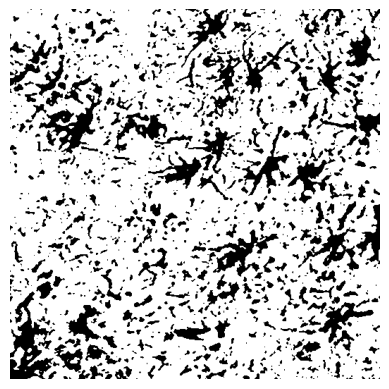

In [158]:
output=threshold_img.copy()
blurred = cv2.GaussianBlur(output, (3, 3), 0)
median_blurred = cv2.medianBlur(output, 3)
dbilateral_filter = cv2.bilateralFilter(src=median_blurred, d=15, sigmaColor=20, sigmaSpace=750)


plt.imshow(median_blurred,cmap='gray')
plt.axis('off')
plt.show()
plt.imshow(dbilateral_filter,cmap='gray')
plt.axis('off')
plt.show()

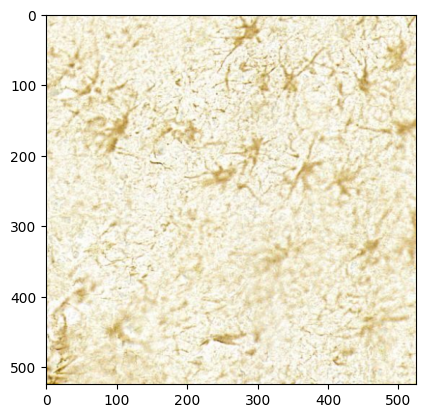

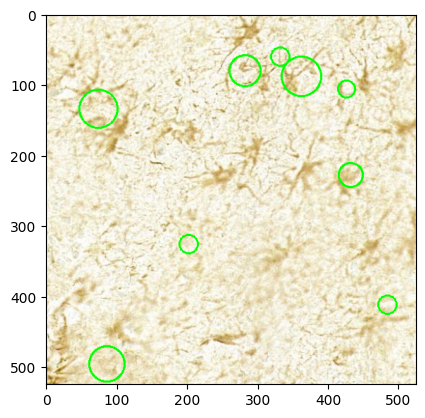

In [116]:
output1=img.copy()
plt.imshow(output1)
plt.show()
circles=cv2.HoughCircles(median_blurred, cv2.HOUGH_GRADIENT, dp=1, minDist=10,
                         param1=50, param2=17, minRadius=12, maxRadius=30)
detected_circles = np.uint16(np.around(circles))
for (x,y,r) in detected_circles[0, :]:
    cv2.circle(output1, (x, y), r, (0, 255, 0), 2)
    # cv2.rectangle(img, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)
plt.imshow(output1)